<a href="https://colab.research.google.com/github/jlonge4/gen_ai_utils/blob/main/sonnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install boto3

In [5]:
# setup bedrock client
import boto3
runtime = boto3.client('bedrock-runtime')

In [13]:
import base64
# util function borrowed from: https://github.com/anthropics/anthropic-cookbook/blob/main/multimodal/best_practices_for_vision.ipynb
def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        base64_string = base64.b64encode(image_file.read()).decode('utf8')
        return base64_string

In [8]:
import json
import boto3

def invoke_sonnet(query, model_id, image=None):
  model_id = model_id
  accept = "application/json"
  contentType = "application/json"
  if image != None:

    image_content = [
      {
        "type": "image",
        "source": {
            "type": "base64",
            "media_type": "image/jpeg",
            "data": get_base64_encoded_image(image)
        }
      },
      {"type": "text",
      "text": query
      }
    ]

    payload = {"messages":[{"role":"user","content":image_content}],
                 "anthropic_version":"bedrock-2023-05-31","max_tokens":2000}

  else:
    text_content = [{'type':'text','text': query}]
    payload = {"messages":[{"role":"user","content":text_content}],
    "anthropic_version":"bedrock-2023-05-31" ,"max_tokens":2000}

  response = runtime.invoke_model(
      body=json.dumps(payload),
      modelId=model_id,
      accept=accept,
      contentType=contentType
  )

  response_body = json.loads(response.get("body").read())
  return response_body['content'][0]['text']

HAIKU IS QUITE A BIT FASTER WITH A COMPRABLE RESPONSE

In [11]:
%%time
from pprint import pprint
# ids : 'anthropic.claude-3-sonnet-20240229-v1:0' , "anthropic.claude-3-haiku-20240307-v1:0"
result = invoke_sonnet('Give me a list comprehension in python to iterate through a list of dicts and grab all of the "meta" fields', model_id="anthropic.claude-3-haiku-20240307-v1:0")
pprint(result)

("Certainly! Here's an example of a list comprehension in Python that iterates "
 'through a list of dictionaries and extracts all the "meta" fields:\n'
 '\n'
 '```python\n'
 'data = [\n'
 "    {'id': 1, 'name': 'John', 'meta': {'age': 30, 'email': "
 "'john@example.com'}},\n"
 "    {'id': 2, 'name': 'Jane', 'meta': {'age': 25, 'email': "
 "'jane@example.com'}},\n"
 "    {'id': 3, 'name': 'Bob', 'meta': {'age': 40, 'email': "
 "'bob@example.com'}}\n"
 ']\n'
 '\n'
 "meta_fields = [item['meta'] for item in data]\n"
 'print(meta_fields)\n'
 '```\n'
 '\n'
 'In this example, the `data` list contains a list of dictionaries, where each '
 "dictionary has an `'id'`, `'name'`, and `'meta'` key. The `'meta'` key "
 "contains another dictionary with `'age'` and `'email'` keys.\n"
 '\n'
 "The list comprehension `[item['meta'] for item in data]` iterates through "
 'the `data` list, and for each dictionary, it extracts the value associated '
 "with the `'meta'` key and adds it to the resulting list

In [12]:
%%time
from pprint import pprint
# ids : 'anthropic.claude-3-sonnet-20240229-v1:0' , "anthropic.claude-3-haiku-20240307-v1:0"
result = invoke_sonnet('Give me a list comprehension in python to iterate through a list of dicts and grab all of the "meta" fields', model_id='anthropic.claude-3-sonnet-20240229-v1:0')
pprint(result)

("Certainly! Here's a Python list comprehension to iterate through a list of "
 'dictionaries and grab all the "meta" fields:\n'
 '\n'
 '```python\n'
 'data = [\n'
 '    {"name": "John", "age": 25, "meta": {"city": "New York", "country": '
 '"USA"}},\n'
 '    {"name": "Jane", "age": 30, "meta": {"city": "London", "country": '
 '"UK"}},\n'
 '    {"name": "Bob", "age": 35, "meta": {"city": "Paris", "country": '
 '"France"}}\n'
 ']\n'
 '\n'
 'meta_fields = [item["meta"] for item in data]\n'
 'print(meta_fields)\n'
 '```\n'
 '\n'
 'Output:\n'
 '```\n'
 "[{'city': 'New York', 'country': 'USA'}, {'city': 'London', 'country': "
 "'UK'}, {'city': 'Paris', 'country': 'France'}]\n"
 '```\n'
 '\n'
 'Explanation:\n'
 '\n'
 '- `data` is a list of dictionaries, where each dictionary contains keys like '
 '"name", "age", and "meta".\n'
 '- The list comprehension `[item["meta"] for item in data]` iterates over '
 'each dictionary `item` in the `data` list and retrieves the value of the '
 '"meta" key.

Lets test a table...

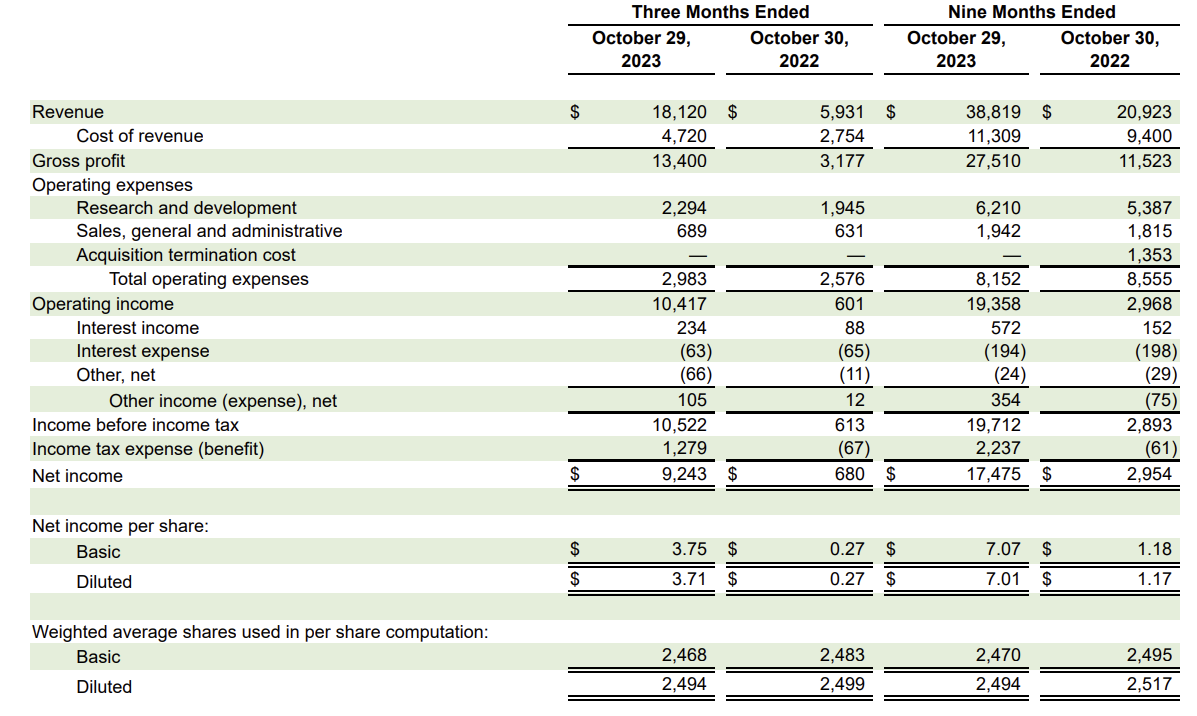

In [ ]:
%%time
result = invoke_sonnet('Give me a question that someone may ask that would describe this image.', '/content/Screenshot 2023-12-28 213003.png')
pprint(result)

('One question that could describe this image is: "What key financial metrics '
 'and figures are shown in this income statement or earnings report for the '
 'company over the three-month and nine-month periods ended October 29, 2023 '
 'and October 30, 2022?"\n'
 '\n'
 'This image appears to be presenting a corporate financial statement, likely '
 'an income statement or earnings report, displaying revenue, expenses, '
 'profitability, and per-share earnings figures across different time periods '
 'for comparative analysis.')
CPU times: user 114 ms, sys: 8.65 ms, total: 123 ms
Wall time: 7.76 s
